# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
%matplotlib inline

# Reading csv file

In [2]:
df=pd.read_csv("C:/Users/charl/OneDrive/Desktop/big mart sales prediction train set.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df['Item_Weight'].mean()

12.857645184135976

# Exploratory data analysis(EDA) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
num_col=df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_col=df.select_dtypes(include=["object"]).columns.tolist()
print("Numerical Columns:",num_col)
print("\nCategorical columns:",cat_col)

Numerical Columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [10]:
np.where(df.isnull().any(axis=1))

(array([   3,    7,    8, ..., 8509, 8514, 8519], dtype=int64),)

In [11]:
df.duplicated().sum()

0

# Handling Missing Values

Handling missing values in Item Weight by mean

In [12]:
item_weight_mean=df.pivot_table(values='Item_Weight',index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
miss_bool=df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
for i,item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i]=df['Item_Weight'].mean()

C:\Users\charl\AppData\Local\Temp\ipykernel_6136\1417637873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i]=df['Item_Weight'].mean()


In [15]:
df['Item_Weight'].isnull().sum()

0

In [16]:
sum(df['Item_Weight']==0)

0

In [17]:
df[9:30]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
10,FDY07,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
11,FDA03,18.500000,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
12,FDX32,15.100000,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
13,FDS46,17.600000,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076
14,FDF32,16.350000,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.4260
15,FDP49,9.000000,Regular,0.069089,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192
16,NCB42,11.800000,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
17,FDP49,9.000000,Regular,0.069196,Breakfast,54.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,718.3982
18,DRI11,12.857645,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


Handling missing values in Outlet Size by mode

In [18]:
mode_of_outlet_size=df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [19]:
missing_values=df['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [20]:
df.loc[missing_values,'Outlet_Size']=df.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [21]:
df['Outlet_Size'].isnull().sum()

0

In [22]:
df[4:20]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
10,FDY07,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
11,FDA03,18.500000,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
12,FDX32,15.100000,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
13,FDS46,17.600000,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076


# Inconsitent values

In [23]:
#Replacing values using replace()function
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [24]:
df['Item_Fat_Content'].nunique()

2

In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
sum(df['Item_Visibility']==0)

526

In [27]:
df.loc[:,'Item_Visibility'].replace(0,df['Item_Visibility'].mean(),inplace=True)

In [28]:
sum(df['Item_Visibility']==0)

0

# Handling missing values with median is OK, But not recommended when you have large set of dataset

## We need to substitue the mean for the data column

Before substitue the mean you need to check the column has outliers or not.If the column has no outlier you can substitue
the mean of the data column.But the column has Outlier you need to fix the outliers and after you can substitue the mean to your
null values.

# Finding Outliers in the data

In this we have a Outlier in Item Visibility we need to fix it using Outlier detection Techinques.In this we use IQR method

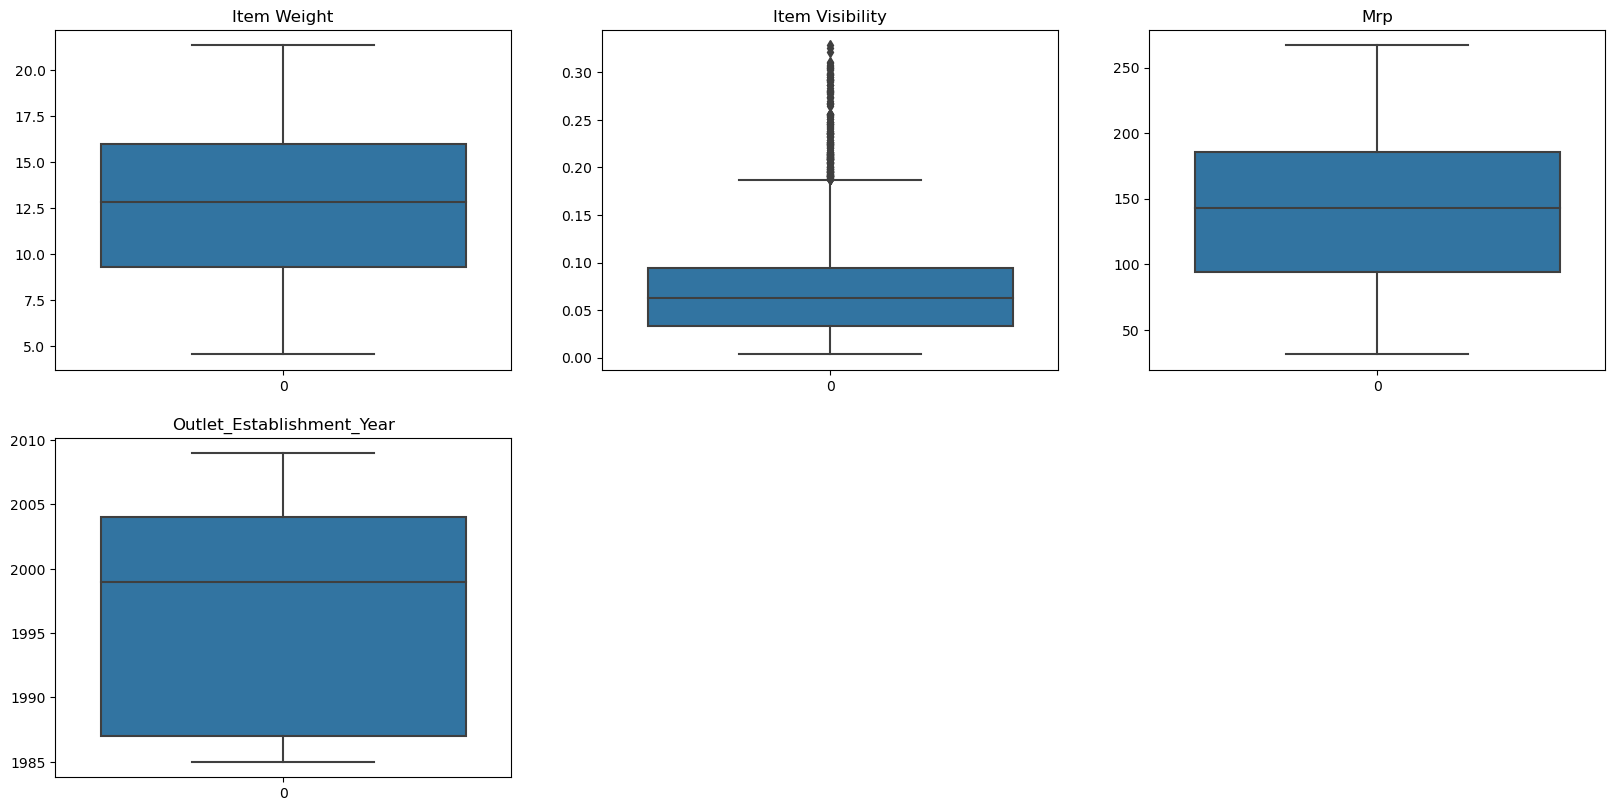

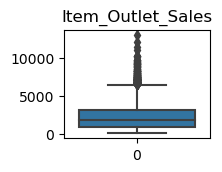

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(df['Item_Weight'])
plt.title('Item Weight')

plt.subplot(3,3,2)
sns.boxplot(df['Item_Visibility'])
plt.title('Item Visibility')

plt.subplot(3,3,3)
sns.boxplot(df['Item_MRP'])
plt.title('Mrp')

plt.subplot(3,3,4)
sns.boxplot(df['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year')
plt.show()

plt.subplot(3,3,5)
sns.boxplot(df['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')
plt.show()

# Handling Outliers using IQR Method

In [30]:
df['Item_Visibility']=df['Item_Visibility'].clip(lower=df['Item_Visibility'].quantile(0.05),upper=df['Item_Visibility'].quantile(0.95))

Text(0.5, 1.0, 'Item Visibility')

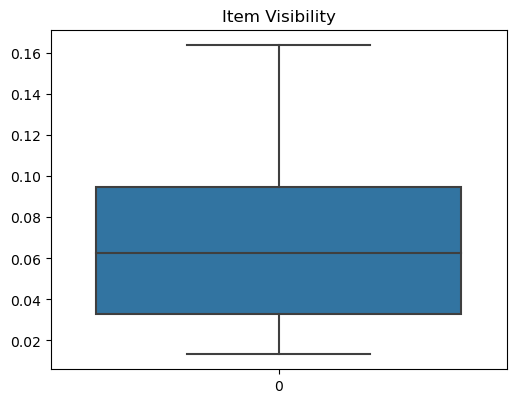

In [31]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(df['Item_Visibility'])
plt.title('Item Visibility')

# Visualizing the Dataset

## Numerical Columns

C:\Users\charl\AppData\Local\Temp\ipykernel_6136\2704494321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

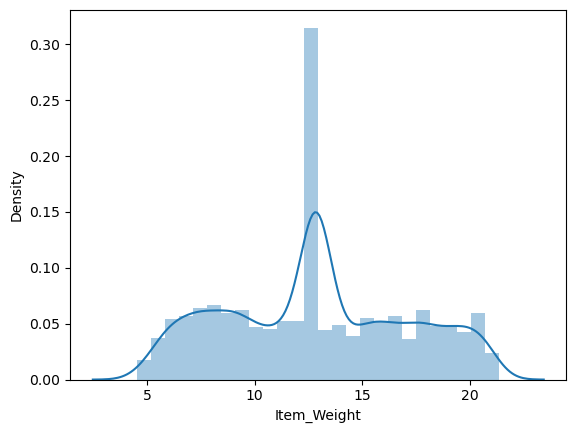

In [32]:
sns.distplot(df['Item_Weight']) 

C:\Users\charl\AppData\Local\Temp\ipykernel_6136\852521860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

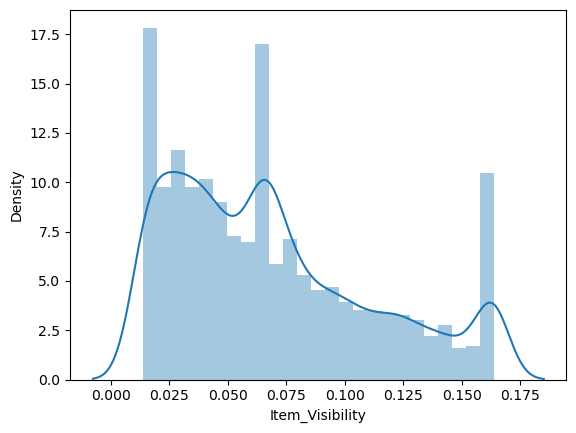

In [33]:
sns.distplot(df['Item_Visibility'])

C:\Users\charl\AppData\Local\Temp\ipykernel_6136\3960882487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


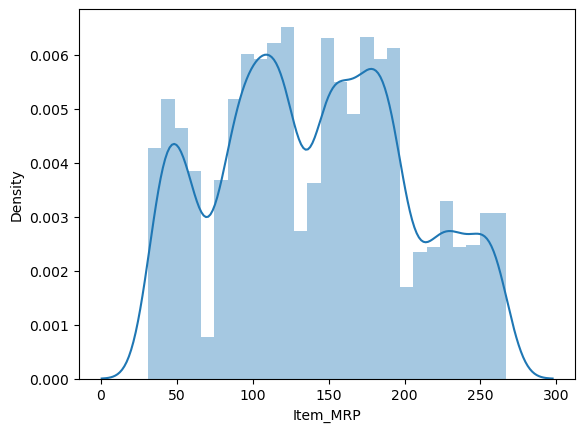

In [34]:
sns.distplot(df['Item_MRP'])
plt.show()

           Most of the people bought the item price between 100 to 200 range

<Axes: >

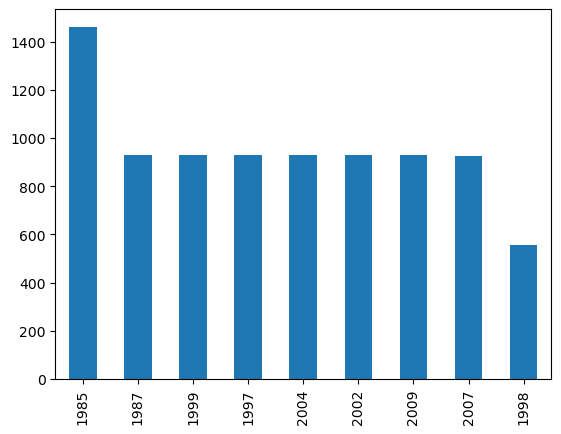

In [35]:
df['Outlet_Establishment_Year'].value_counts().plot.bar()

C:\Users\charl\AppData\Local\Temp\ipykernel_6136\1265494514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

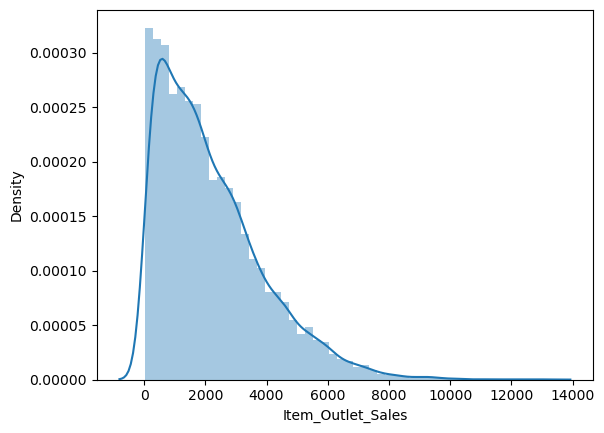

In [36]:
sns.distplot(df['Item_Outlet_Sales'])

C:\Users\charl\AppData\Local\Temp\ipykernel_6136\1265494514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

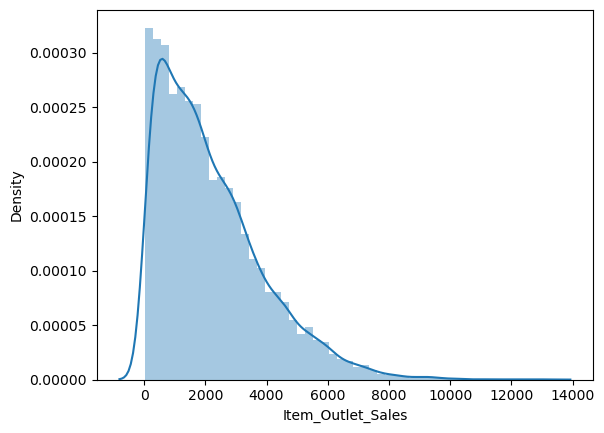

In [37]:
sns.distplot(df['Item_Outlet_Sales'])

## Catorigal Columns

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

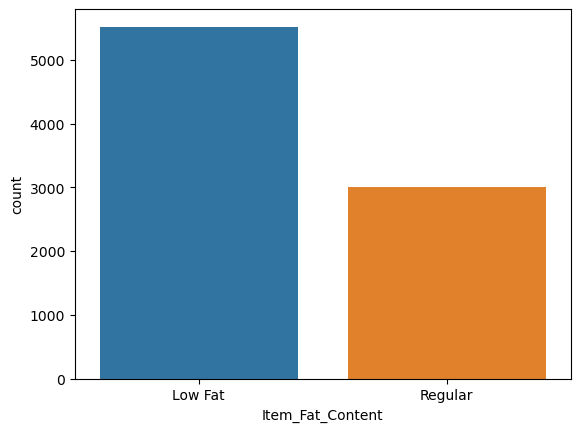

In [38]:
sns.countplot(data=df,x='Item_Fat_Content')

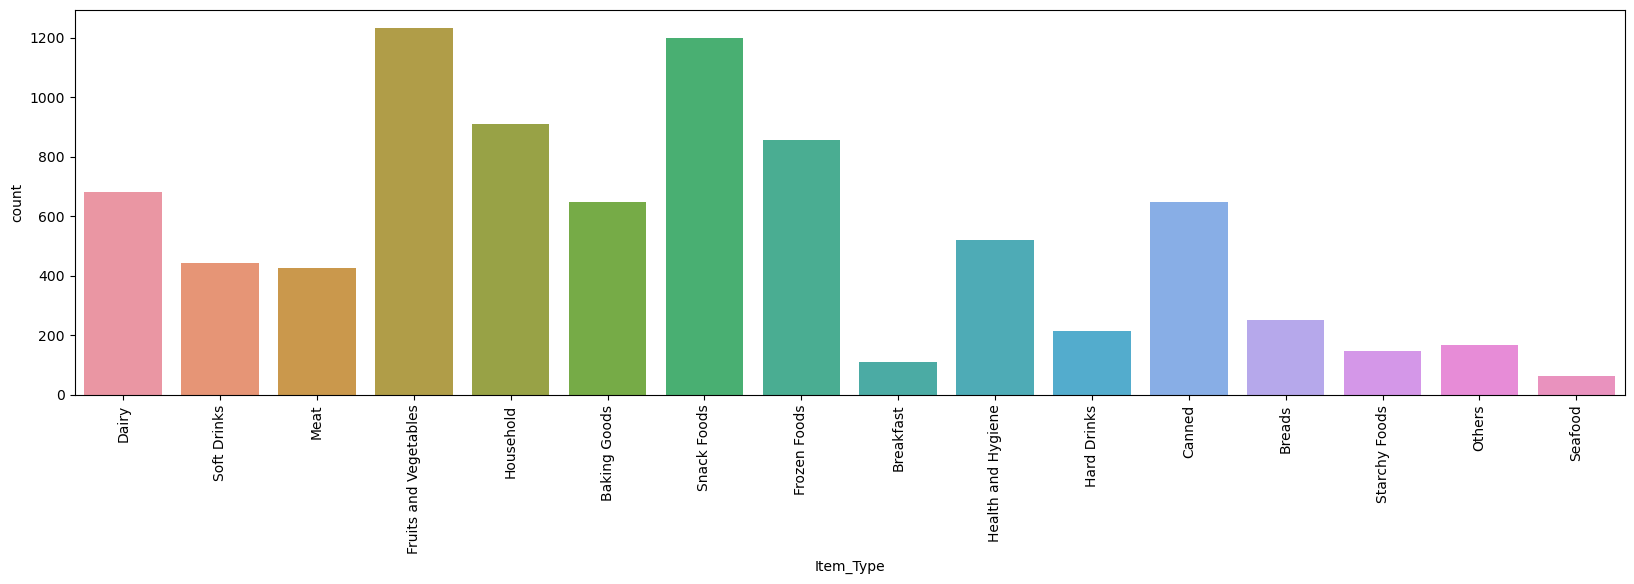

In [39]:
plt.figure(figsize=(20,5))
l=list(df['Item_Type'].unique())
chart=sns.countplot(data=df,x='Item_Type')
chart.set_xticklabels(labels=l,rotation=90)
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='count'>

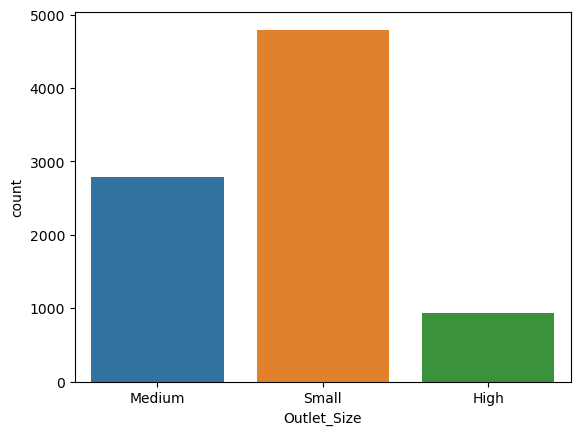

In [40]:
sns.countplot(data=df,x='Outlet_Size')

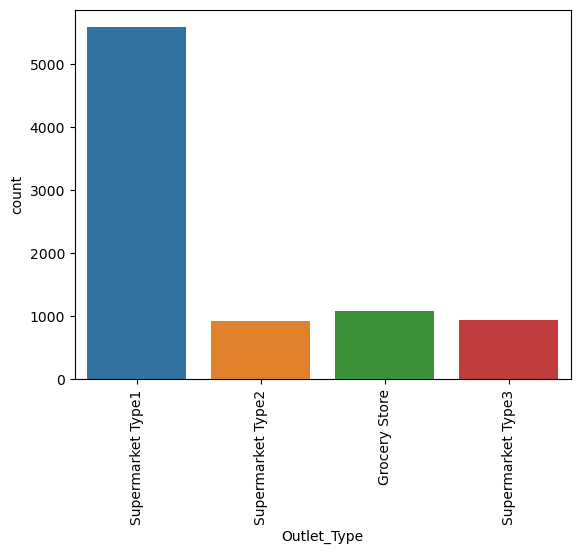

In [41]:
a=list(df['Outlet_Type'].unique())
graph=sns.countplot(data=df,x='Outlet_Type')
graph.set_xticklabels(labels=a,rotation=90)
plt.show()

# Corelation Martix

C:\Users\charl\AppData\Local\Temp\ipykernel_6136\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

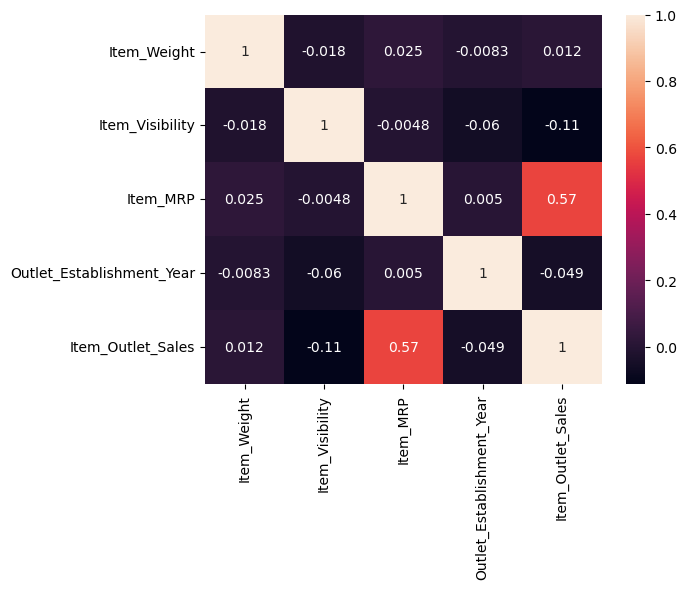

In [42]:
sns.heatmap(df.corr(),annot=True)

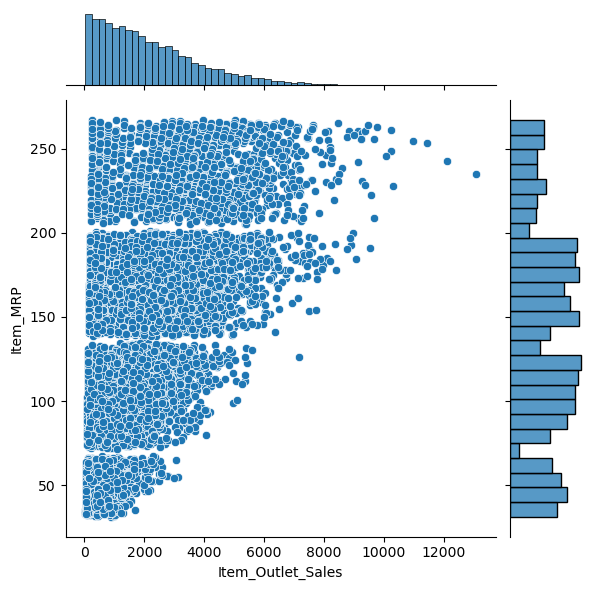

In [43]:
sns.jointplot(data=df,x='Item_Outlet_Sales',y='Item_MRP')

<Axes: xlabel='Item_Weight', ylabel='Item_MRP'>

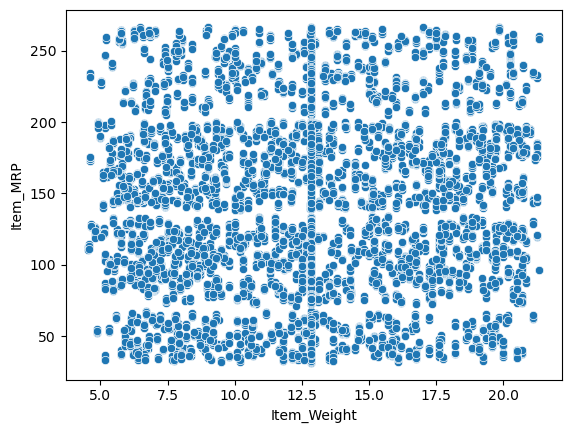

In [44]:
sns.scatterplot(data=df,x='Item_Weight',y='Item_MRP')

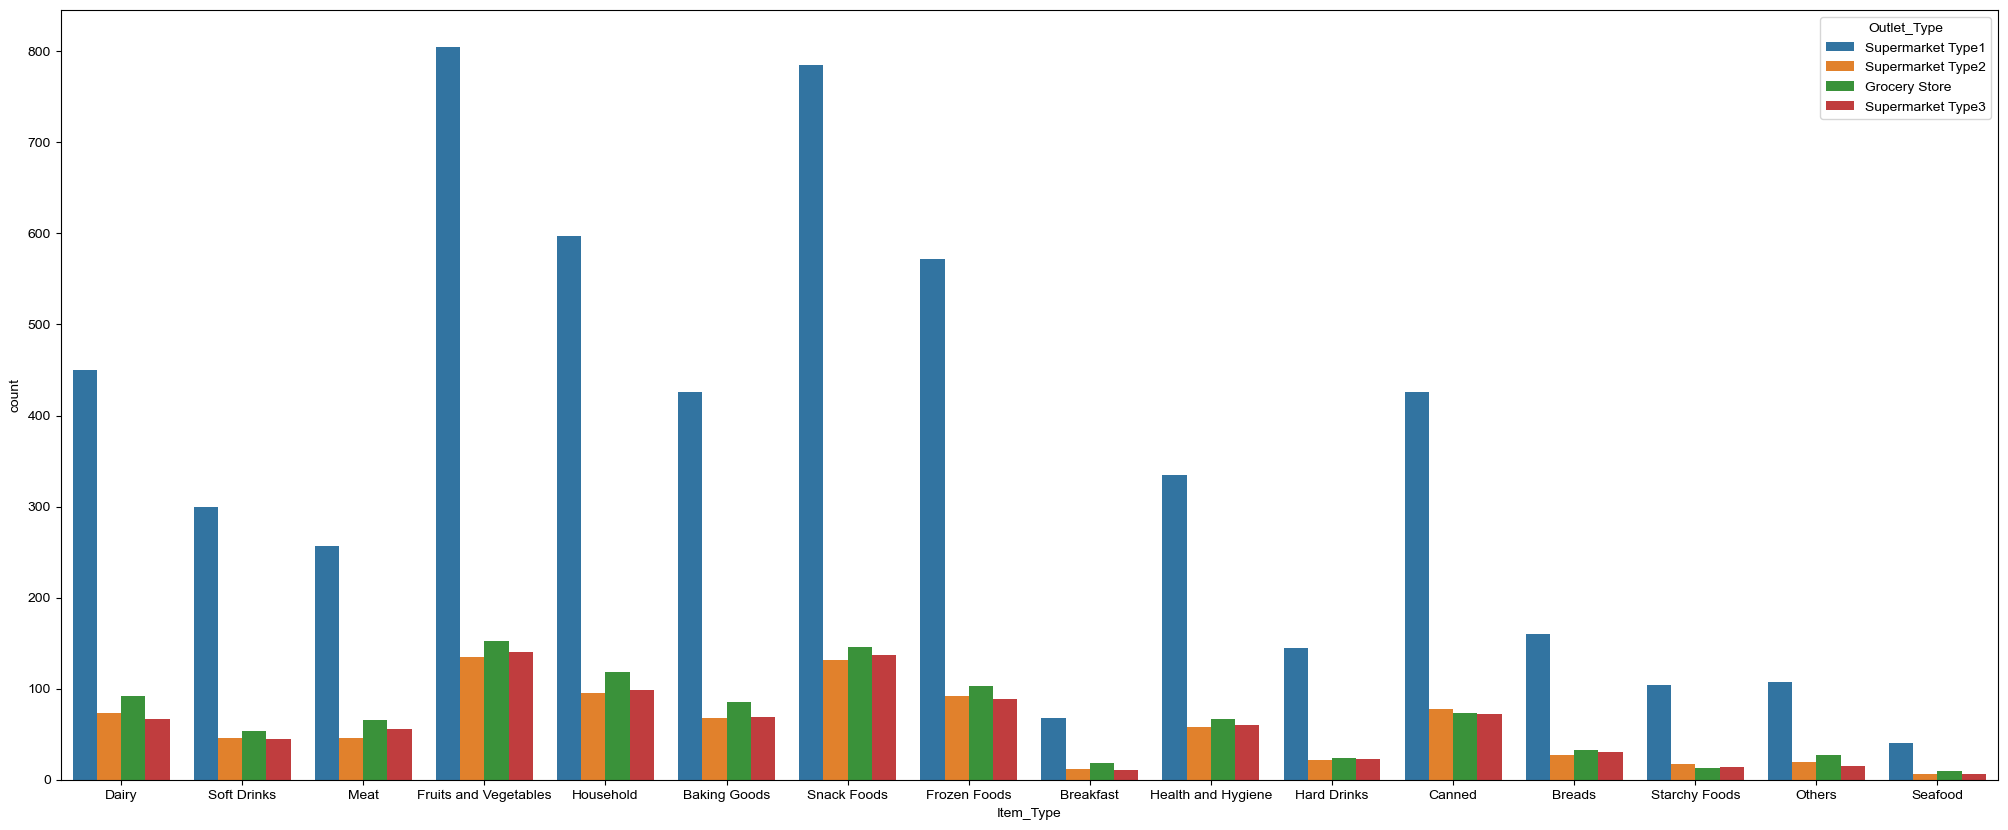

In [45]:
#Finding item is more sales in Outlet Type
plt.figure(figsize=(25,10))
sns.countplot(x='Item_Type',data=df,hue='Outlet_Type')
sns.set(font_scale=1)
plt.show()

Majority sales in supermarket Type1 compared to other types and the
Most sales Items in all Outlet Type is Fruits and Vegetables & Snack Food also
Least sales Items in all Outlet Type is seafood

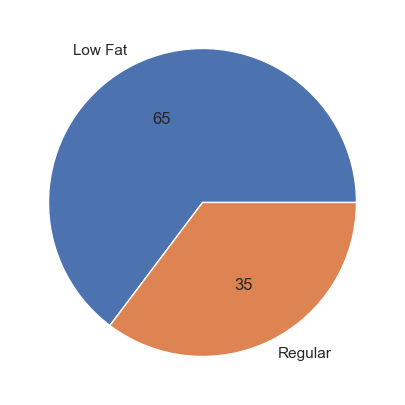

In [46]:
x=df['Item_Fat_Content'].value_counts()
plt.figure(figsize=(15,5))
plt.pie(x,labels=x.index,autopct='%1.f')
plt.show()

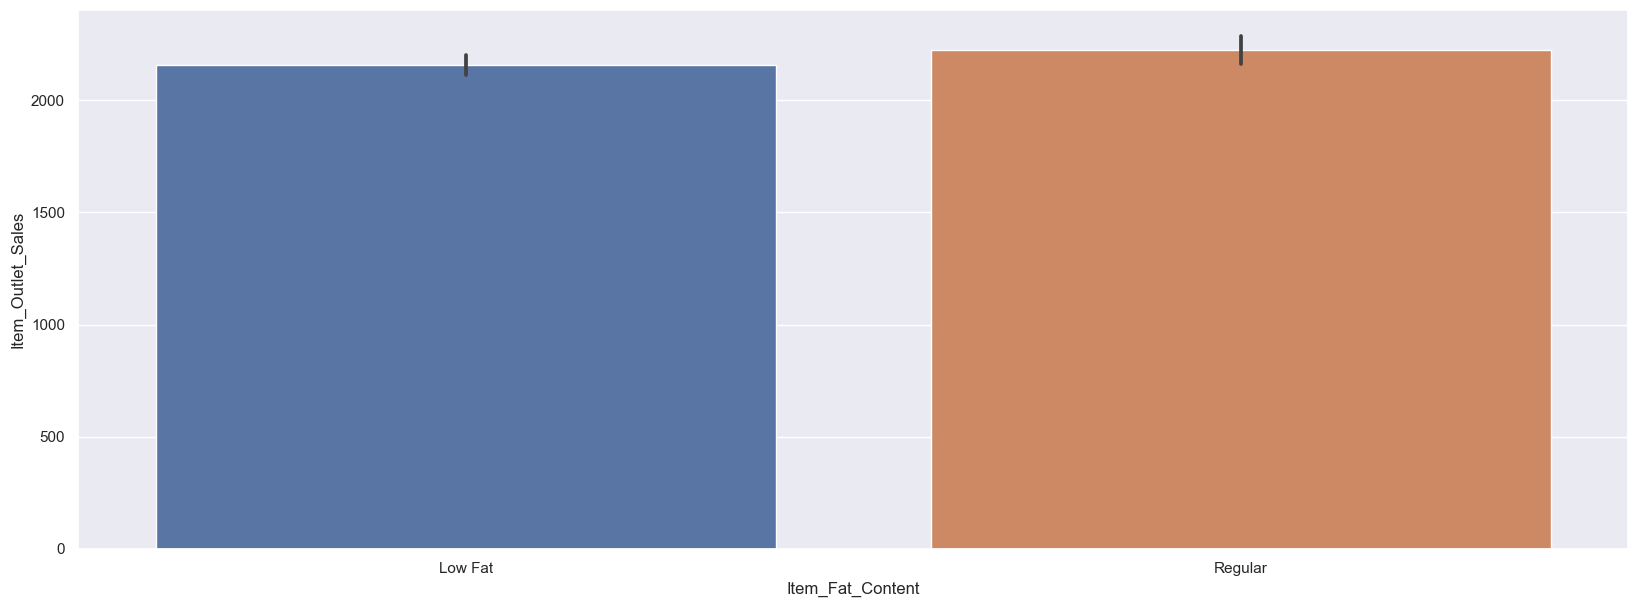

In [47]:
plt.figure(figsize=(20,7))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)
sns.set(font_scale=1.5)
plt.show()

# Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [49]:
cat_col=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [50]:
for col in cat_col:
    df[col]=encoder.fit_transform(df[col])

In [51]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,1121,19.200,1,0.066132,6,182.0950,OUT010,1998,2,2,0,732.3800
4,1297,8.930,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,OUT045,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976


C:\Users\charl\AppData\Local\Temp\ipykernel_6136\1756675377.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,vmax=0.30,vmin=0.01)


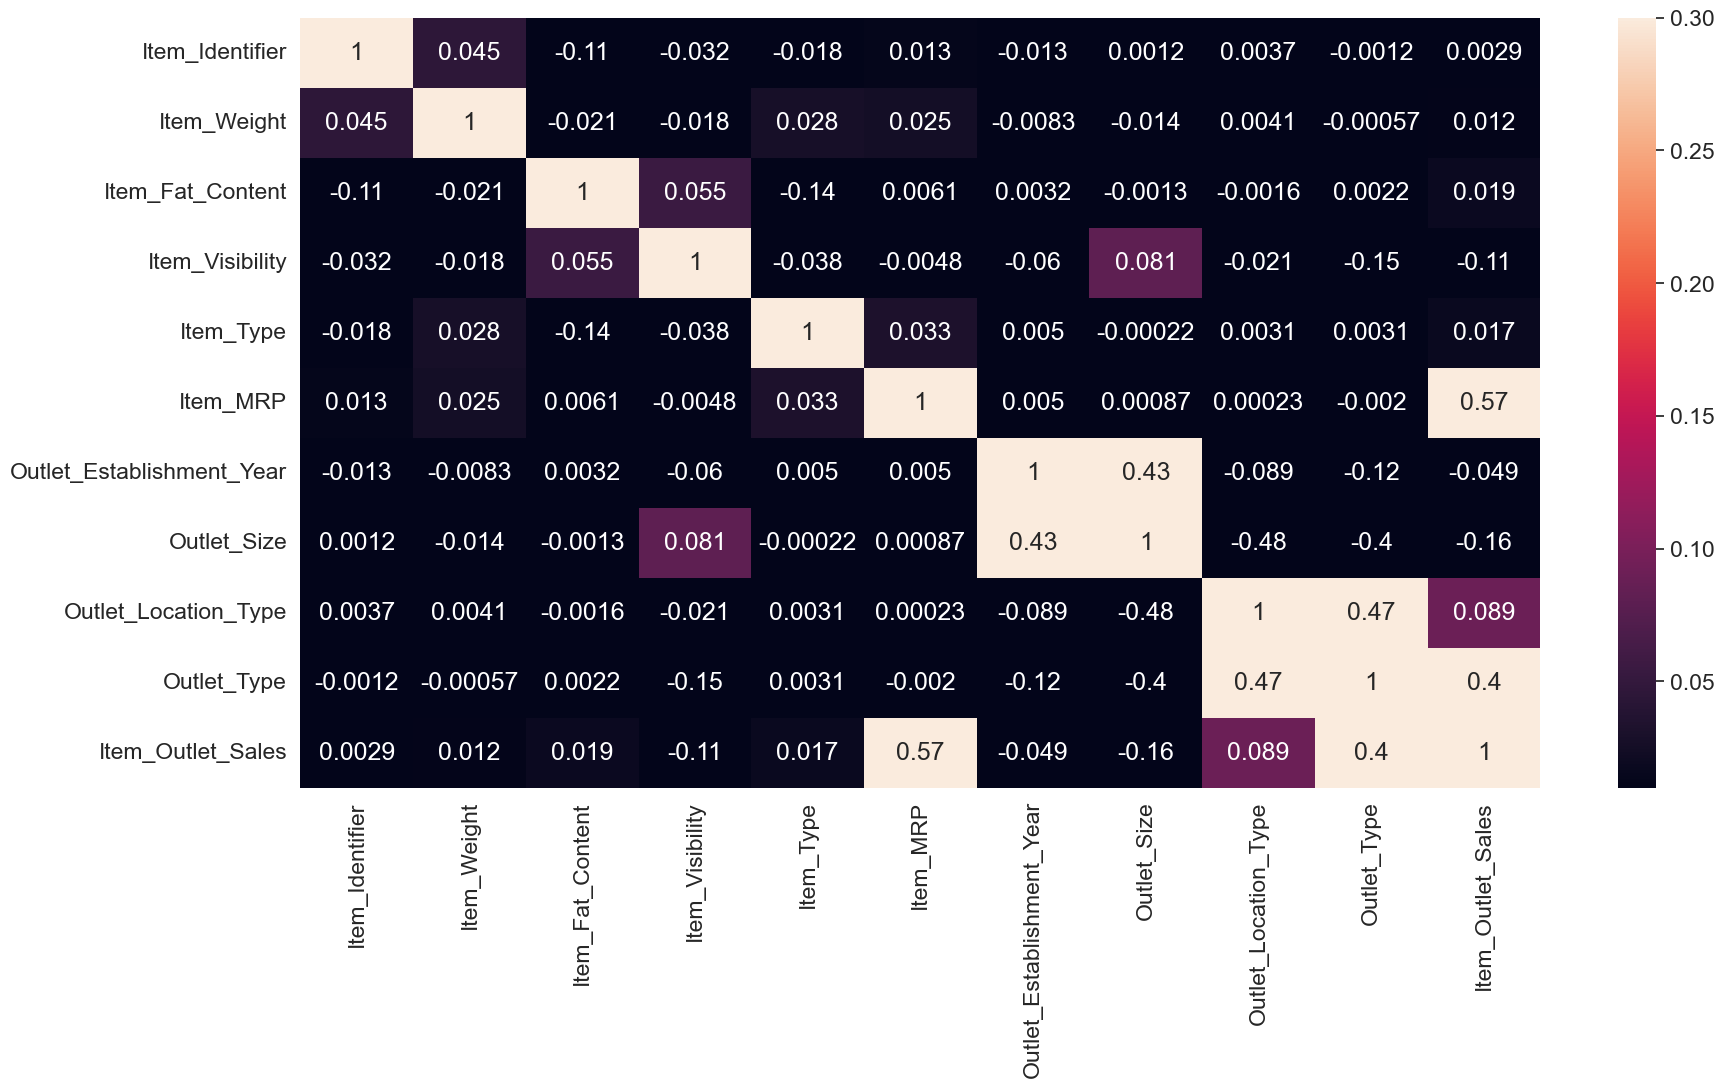

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmax=0.30,vmin=0.01)
sns.set(font_scale=1)

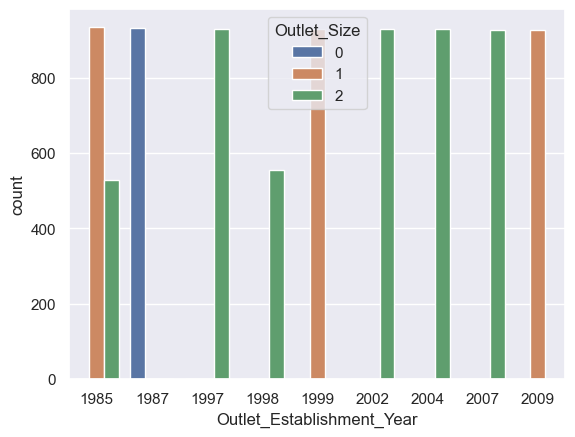

In [53]:
sns.countplot(data=df,x='Outlet_Establishment_Year',hue='Outlet_Size')
plt.show()

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

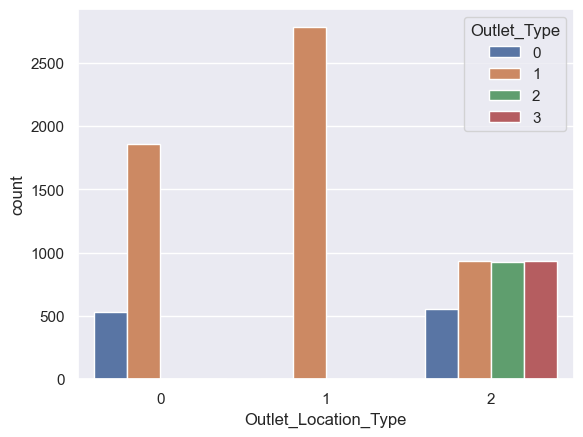

In [54]:
sns.countplot(data=df,x='Outlet_Location_Type',hue='Outlet_Type')

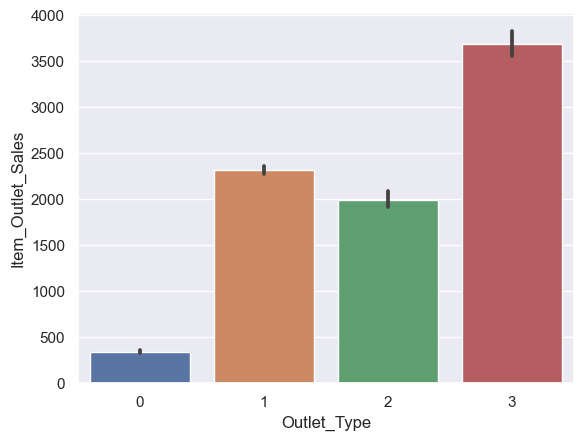

In [55]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)
plt.show()

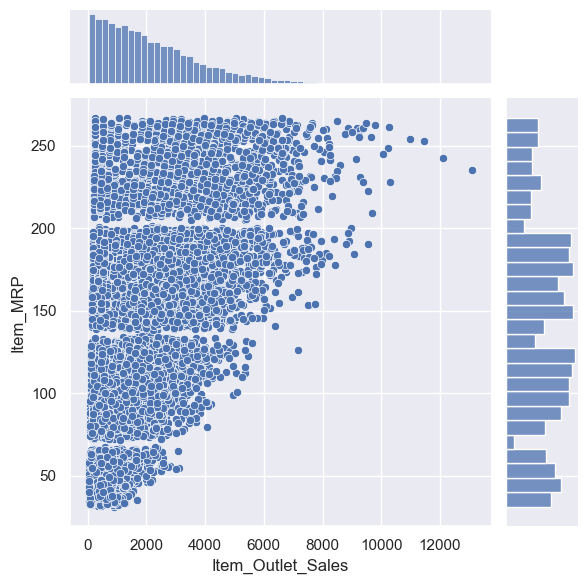

In [56]:
sns.jointplot(x='Item_Outlet_Sales',y='Item_MRP',data=df)

#Normalization 
#using log tranformation
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales']) 

In [57]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Item_Outlet_Sales']=scaler.fit_transform(df[['Item_Outlet_Sales']])

In [58]:
df['Item_Outlet_Sales']

0       0.283587
1       0.031419
2       0.158115
3       0.053555
4       0.073651
          ...   
8518    0.210293
8519    0.039529
8520    0.088850
8521    0.138835
8522    0.056105
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Train Test split

In [59]:
x=df[['Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Item_MRP']].values
x

array([[1.999000e+03, 1.000000e+00, 0.000000e+00, 2.498092e+02],
       [2.009000e+03, 1.000000e+00, 2.000000e+00, 4.826920e+01],
       [1.999000e+03, 1.000000e+00, 0.000000e+00, 1.416180e+02],
       ...,
       [2.004000e+03, 2.000000e+00, 1.000000e+00, 8.512240e+01],
       [2.009000e+03, 1.000000e+00, 2.000000e+00, 1.031332e+02],
       [1.997000e+03, 2.000000e+00, 0.000000e+00, 7.546700e+01]])

In [60]:
y=df['Item_Outlet_Sales'].values
y

array([0.28358666, 0.03141895, 0.15811486, ..., 0.08885035, 0.13883505,
       0.05610527])

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
x_train

array([[1.985000e+03, 1.000000e+00, 2.000000e+00, 1.235414e+02],
       [2.002000e+03, 2.000000e+00, 1.000000e+00, 5.203240e+01],
       [1.997000e+03, 2.000000e+00, 0.000000e+00, 6.062200e+01],
       ...,
       [2.004000e+03, 2.000000e+00, 1.000000e+00, 7.839600e+01],
       [2.002000e+03, 2.000000e+00, 1.000000e+00, 1.214072e+02],
       [1.999000e+03, 1.000000e+00, 0.000000e+00, 1.820634e+02]])

In [63]:
y_train

array([0.34280322, 0.08099561, 0.19483831, ..., 0.10762012, 0.2414567 ,
       0.34555748])

In [64]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [65]:
regression.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred=regression.predict(x_test)

In [67]:
y_pred

array([0.17162459, 0.08526728, 0.13788273, ..., 0.35367545, 0.03750298,
       0.30284164])

In [68]:
print('Train Score: ', regression.score(x_train, y_train))  
print('Test Score: ', regression.score(x_test, y_test))

Train Score:  0.3500137800175811
Test Score:  0.34586814532848875


In [69]:
from sklearn.linear_model import LinearRegression  
lin_regs= LinearRegression()  
lin_regs.fit(x,y) 

LinearRegression()

In [70]:
from sklearn.preprocessing import PolynomialFeatures  
poly= PolynomialFeatures(degree= 2)  
x_train_poly= poly.fit_transform(x_train) 
x_test_poly= poly.transform(x_test) 
model=LinearRegression()  
model.fit(x_train_poly, y_train) 

LinearRegression()

In [71]:
y_predict=model.predict(x_test_poly)
y_predict

array([ 0.18702673,  0.18719102,  0.1688104 , ...,  0.35331645,
       -0.06038298,  0.41036969])

In [72]:
print('Train Score: ',model.score(x_train_poly, y_train))  
print('Test Score: ', model.score(x_test_poly, y_test))

Train Score:  0.5691252311438955
Test Score:  0.5730776375662773


In [73]:
num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = df.select_dtypes(include=["object"]).columns.tolist()
print("Numerical_features : ",num_features)
print("\nCategorical_features : ",cat_features)

Numerical_features :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

Categorical_features :  ['Outlet_Identifier']


In [74]:
def encode_multinomial_variable_usingDiff_Encoding(data, column_name, encoding_type='one-hot', target_column=None):
    """
    Encode a multinomial categorical variable using different encoding methods.

    Parameters:
    - data: DataFrame containing the dataset.
    - column_name: Name of the categorical column to be encoded.
    - encoding_type: Type of encoding to be used ('one-hot', 'label', or 'target').
    - target_column: Name of the target column (only required for 'target' encoding).

    Returns:
    - Encoded DataFrame based on the specified encoding type.
    """
    encoded_data = data.copy()  # Create a copy of the original DataFrame
    
    if encoding_type == 'one-hot':
        # One-hot encoding
        encoded_data = pd.get_dummies(encoded_data, columns=[column_name], prefix=[column_name])
    elif encoding_type == 'label':
        # Label encoding
        encoded_data[column_name] = encoded_data[column_name].astype('category').cat.codes
    elif encoding_type == 'target':
        if not target_column:
            raise ValueError("Target column name must be provided for target encoding.")
        # Target encoding
        encoding_map = data.groupby(column_name)[target_column].mean().to_dict()
        encoded_data[column_name] = encoded_data[column_name].map(encoding_map)
    else:
        raise ValueError("Invalid encoding_type. Use 'one-hot', 'label', or 'target'.")
    
    return encoded_data

In [75]:
for column_name in cat_features:
    df=encode_multinomial_variable_usingDiff_Encoding(df, column_name, encoding_type='label', target_column=None)

In [76]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,0.283587
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,0.031419
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,0.158115
3,1121,19.200,1,0.066132,6,182.0950,0,1998,2,2,0,0.053555
4,1297,8.930,0,0.066132,9,53.8614,1,1987,0,2,1,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,0.210293
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,0.039529
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,0.088850
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,0.138835


<Axes: >

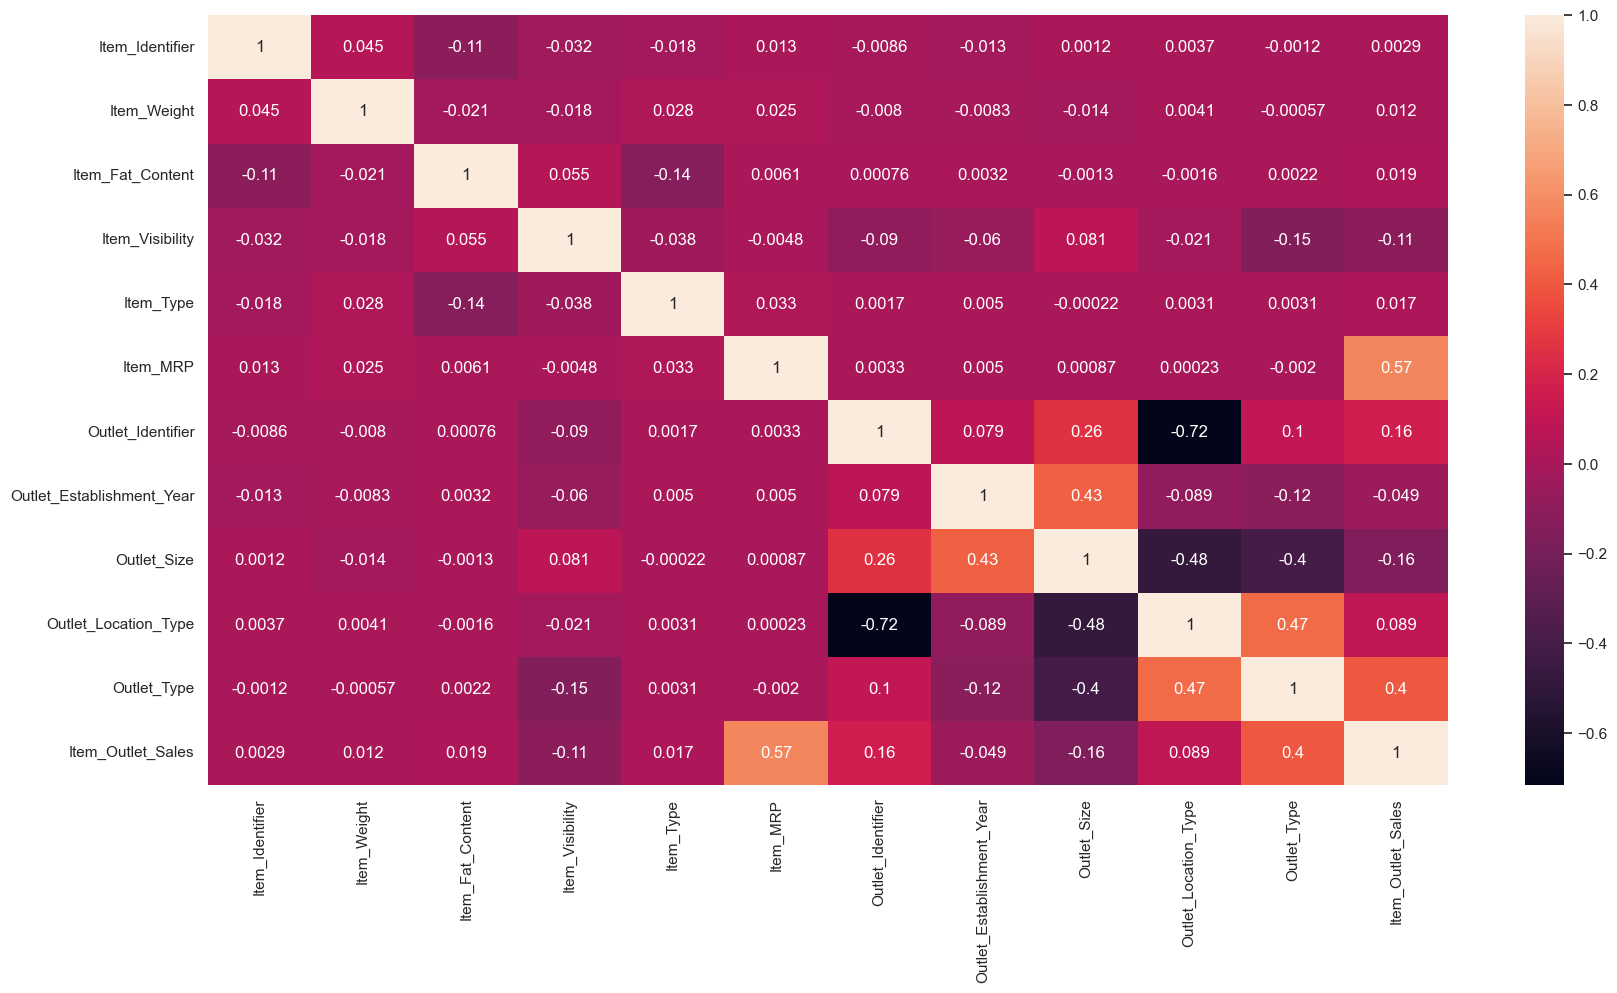

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [78]:
a= df.iloc[:, :-1].values  
b= df.iloc[:, 11].values 

In [79]:
a

array([[1.560e+02, 9.300e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [8.000e+00, 5.920e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        2.000e+00],
       [6.620e+02, 1.750e+01, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.357e+03, 1.060e+01, 0.000e+00, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [6.810e+02, 7.210e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        2.000e+00],
       [5.000e+01, 1.480e+01, 0.000e+00, ..., 2.000e+00, 0.000e+00,
        1.000e+00]])

In [80]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=0)

plt.scatter(x,y,color="blue")  
plt.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
plt.title("Bluff detection model(Polynomial Regression)")  
plt.xlabel("Item_MRP")  
plt.ylabel("Item_Outlet_Sales")  
plt.show()  

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
modeld=DecisionTreeRegressor()

In [83]:
modeld.fit(x_train,y_train)

DecisionTreeRegressor()

In [84]:
y_pred=modeld.predict(x_test)

In [85]:
y_pred

array([0.17953688, 0.1904009 , 0.2616546 , ..., 0.37927165, 0.00612058,
       0.24451698])

In [86]:
print('Train Score: ',modeld.score(x_train, y_train))  
print('Test Score: ', modeld.score(x_test, y_test))

Train Score:  1.0
Test Score:  0.07728165672799903


In [202]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
